In [1]:
from lbm import Lattice, Geometry

In [2]:
import symbolic.D2Q9 as D2Q9

In [3]:
def cavity(geometry, x, y):
    if x == 1 or y == 1 or x == geometry.size_x-2:
        return 2
    elif y == geometry.size_y-2:
        return 3
    else:
        return 1

In [4]:
boundary = """
    if ( m == 2 ) {
        u_0 = 0.0;
        u_1 = 0.0;
    }
    if ( m == 3 ) {
        u_0 = 0.1;
        u_1 = 0.0;
    }
"""

In [5]:
import time

def MLUPS(cells, steps, time):
    return cells * steps / time * 1e-6

In [6]:
def test(nX, nY, nSteps):
    lattice = Lattice(
        descriptor = D2Q9,
        geometry   = Geometry(nX, nY),
        moments = D2Q9.moments(optimize = False),
        collide = D2Q9.bgk(tau = 0.56),
        boundary_src = boundary)
    lattice.setup_geometry(cavity)
    
    start = time.time()
    
    for i in range(0,nSteps):
        lattice.evolve()
    lattice.sync()
    
    end = time.time()
    
    return MLUPS(lattice.geometry.volume, nSteps, end - start)

In [7]:
results = []
for size in [ 32*i for i in range(1,100) ]:
    perf = test(nX = size, nY = size, nSteps = 100)
    results.append((size, perf))
    print("%4d : %3.0f MLUPS" % (size, perf))

  32 :  15 MLUPS
  64 :  62 MLUPS
  96 : 135 MLUPS
 128 : 233 MLUPS
 160 : 376 MLUPS
 192 : 539 MLUPS
 224 : 744 MLUPS
 256 : 761 MLUPS
 288 : 763 MLUPS
 320 : 776 MLUPS
 352 : 726 MLUPS
 384 : 717 MLUPS
 416 : 750 MLUPS
 448 : 798 MLUPS
 480 : 797 MLUPS
 512 : 818 MLUPS
 544 : 802 MLUPS
 576 : 814 MLUPS
 608 : 814 MLUPS
 640 : 812 MLUPS
 672 : 815 MLUPS
 704 : 815 MLUPS
 736 : 804 MLUPS
 768 : 824 MLUPS
 800 : 728 MLUPS
 832 : 722 MLUPS
 864 : 819 MLUPS
 896 : 826 MLUPS
 928 : 828 MLUPS
 960 : 822 MLUPS
 992 : 824 MLUPS
1024 : 823 MLUPS
1056 : 822 MLUPS
1088 : 822 MLUPS
1120 : 825 MLUPS
1152 : 828 MLUPS
1184 : 821 MLUPS
1216 : 818 MLUPS
1248 : 813 MLUPS
1280 : 828 MLUPS
1312 : 824 MLUPS
1344 : 827 MLUPS
1376 : 826 MLUPS
1408 : 823 MLUPS
1440 : 826 MLUPS
1472 : 824 MLUPS
1504 : 826 MLUPS
1536 : 828 MLUPS
1568 : 823 MLUPS
1600 : 824 MLUPS
1632 : 825 MLUPS
1664 : 828 MLUPS
1696 : 827 MLUPS
1728 : 830 MLUPS
1760 : 831 MLUPS
1792 : 826 MLUPS
1824 : 828 MLUPS
1856 : 826 MLUPS
1888 : 825 MLU

In [8]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('AGG')

Text(0, 0.5, 'MLUPS')

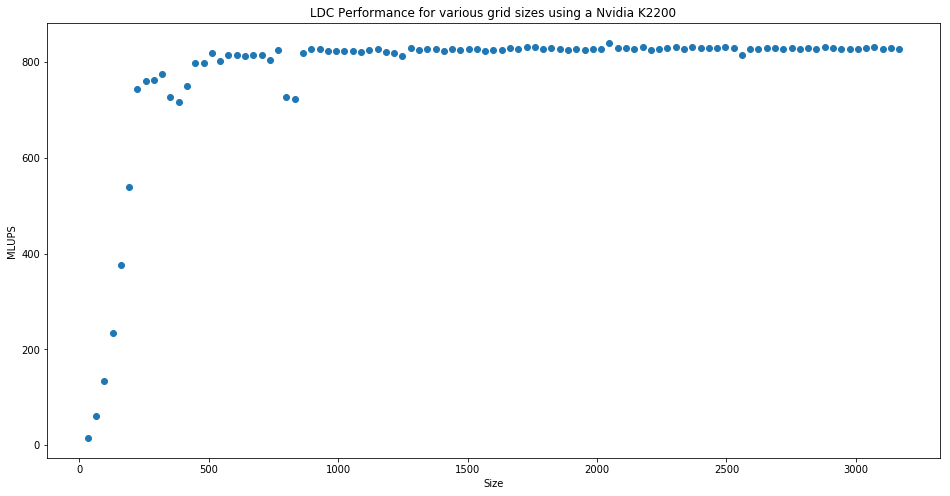

In [9]:
plt.figure(figsize=(16,8))
plt.scatter(*zip(*results))
plt.title('LDC Performance for various grid sizes using a Nvidia K2200')
plt.xlabel('Size')
plt.ylabel('MLUPS')